In [136]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from config import DATA

In [137]:
X = pd.read_csv( os.path.join( DATA, 'features.csv'))

In [138]:
y_experts = pd.read_csv( os.path.join( DATA, 'target.csv' ))
y_experts

,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,spindle,patient_id
0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,0,1
2,2,2,2,2,2,2,2,0,1
3,3,3,3,3,3,3,3,0,1
4,4,4,4,4,4,4,4,0,1
...,...,...,...,...,...,...,...,...,...
28795,28795,28795,28795,28795,28795,28795,28795,0,8
28796,28796,28796,28796,28796,28796,28796,28796,0,8
28797,28797,28797,28797,28797,28797,28797,28797,0,8
28798,28798,28798,28798,28798,28798,28798,28798,0,8


Add the patient id to the labels by matching rows with the features

In [139]:
y_experts['patient_id'] = X['patient_id'].reset_index(drop=True)

In [140]:
y_yasa = pd.read_csv( os.path.join( DATA, 'yasa_labels.csv' ) , index_col=0)
y_yasa.value_counts()

spindle
0.0        28635
1.0          165
Name: count, dtype: int64

### Compare the two labels

In [141]:
y_experts['spindle'].value_counts()

spindle
0    26155
1     2645
Name: count, dtype: int64

In [142]:
y_yasa['spindle'].value_counts()

spindle
0.0    28635
1.0      165
Name: count, dtype: int64

Plot the number of spindles for each patient with yasa

In [143]:
y_yasa.head()

,spindle
patient_id,
1,0.0
1,0.0
1,0.0
1,0.0
1,0.0


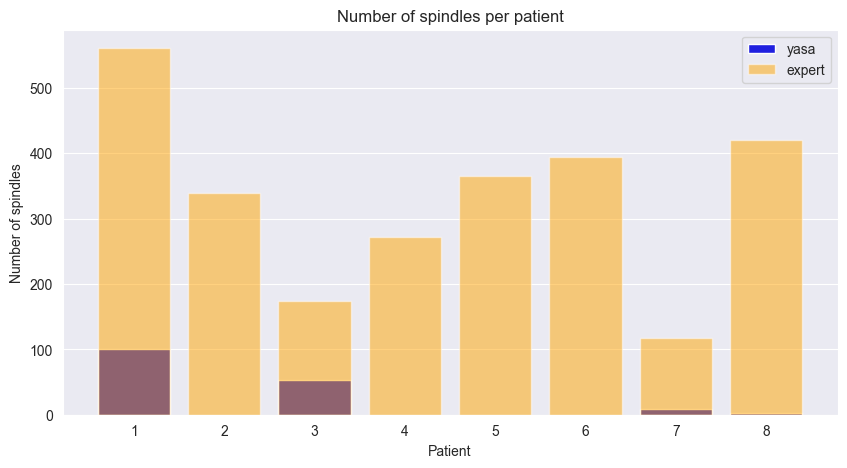

In [144]:
yasa_counts = y_yasa.groupby('patient_id')['spindle'].sum()
expert_counts = y_experts.groupby('patient_id')['spindle'].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=yasa_counts.index, y=yasa_counts.values, color='blue', label='yasa')
# superimpose the expert counts
plt.bar(x=expert_counts.index-1, height=expert_counts.values, color='orange', alpha=0.5, label='expert')
plt.title('Number of spindles per patient')
plt.xlabel('Patient')
plt.ylabel('Number of spindles')
plt.legend()
plt.show()

Yasa finds a lot less spindles than the experts and the provided automatic detection.
We check the overlap between the two labels.

In [145]:
# Assume list1 and list2 are your binary lists
list1 = y_experts['spindle'].values
list2 = y_yasa['spindle'].values

# Get the indices where both lists are 1
overlap_indices = np.where((list1 == 1) & (list2 == 1))

# Count the number of overlapping positive indices
num_overlap = len(overlap_indices[0])

print("Number of overlapping positive indices:", num_overlap)

Number of overlapping positive indices: 165


Most of the spindles found by yasa are also found by the experts, since we are following the paper and using the union of the expert labels, we can add the 15 spindles found by yasa to the expert labels, our target are the possible spindles.

In [146]:
y_experts = y_experts.reset_index(drop=True)
y_yasa = y_yasa.reset_index(drop=True)
y_experts['spindle'] = y_experts['spindle'] + y_yasa['spindle']
# normalize the labels at 1
y_experts['spindle'] = y_experts['spindle'].apply(lambda x: 1 if x > 0 else 0)
y_experts['spindle'].value_counts()

spindle
0    26155
1     2645
Name: count, dtype: int64

In [147]:
y_experts.to_csv(os.path.join(DATA, 'target.csv'))